In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
points = np.array([[2, 1], [2.2, 3.5], [2.7, 4], [3,5], [4, 5.3]])
n = points.shape[0]

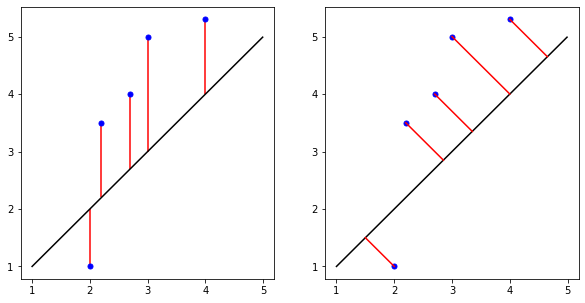

In [9]:
# Draw points and line y = x
x = np.arange(1, 5, 0.01)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ax in [ax1, ax2]:
    ax.plot(points[:, 0], points[:, 1], ".b", ms=10)
    ax.plot(x, x, "k")
# Draw length from each point to line either in terms of y-distance or Euclidean distance
### y-distance:
for j in range(n):    
    ys = [points[j, 0], points[j, 1]]
    ax1.vlines(x=points[j, 0], ymin=np.min(ys), ymax=np.max(ys), color="r")
### Euclidean distance:
for j in range(n):
    init_point = points[j, :]
    if init_point[1] > init_point[0]:
        increment = np.array([0.01, -0.01])
    else:
        increment = np.array([-0.01, 0.01])
    euclid_points = [init_point]
    while not np.isclose(euclid_points[-1][0], euclid_points[-1][1], atol=0.01):
        euclid_points.append(euclid_points[-1]+increment)
    euclid_points = np.stack(euclid_points)
    ax2.plot(euclid_points[:, 0], euclid_points[:, 1], "r")
plt.show()

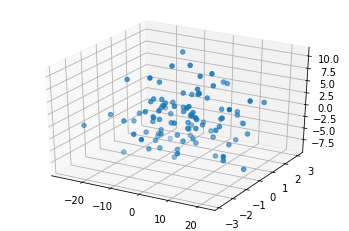

In [11]:
# PCA in 3D
n = 100
points = np.random.randn(100, 3) @ np.diag([10, 1, 5])
theta = np.random.rand() * 2 * np.pi
points = points

### Show ellipsoid
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()